In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("C://Users//Thanisha//Downloads//car data.csv")

# Data Checks 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
#check the no of ynique values of each coln
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [8]:
#check statistics 
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [12]:
#checking the distribution of categorial data
print(df.Fuel_Type.value_counts())
print(df.Selling_Price.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Data Preprocessing

In [16]:
label_encoder = LabelEncoder()

In [17]:
categorical_columns = ['Car_Name']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [19]:
df_encoded['Selling_Price'] = pd.to_numeric(df_encoded['Selling_Price'])

In [20]:
#assuming 'year' is a relevant feature, you might want to convert it to the age of the car
df['Car_Age'] = 2023 - df['Year']
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,68,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,96,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,92,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,66,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,69,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,69,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [21]:
#standardize numerical features using standardscaler
numeric_features = ['Present_Price', 'Driven_kms', 'Car_Age']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [22]:
# Define features (X) and target variable (y)
features = ['Car_Age', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']
X = df[features]
y = df['Selling_Price']

In [23]:
# Assuming df_encoded contains the encoded DataFrame
features = df_encoded.drop('Selling_Price', axis=1)
target = df_encoded['Selling_Price']

In [24]:
print(X)

      Car_Age  Present_Price  Driven_kms Fuel_Type Selling_type Transmission
0   -0.128897      -0.236256   -0.256224    Petrol       Dealer       Manual
1    0.217514       0.221544    0.155911    Diesel       Dealer       Manual
2   -1.168129       0.257472   -0.773969    Petrol       Dealer       Manual
3    0.910335      -0.403151   -0.817758    Petrol       Dealer       Manual
4   -0.128897      -0.087906    0.141743    Diesel       Dealer       Manual
..        ...            ...         ...       ...          ...          ...
296 -0.821718       0.460295   -0.076225    Diesel       Dealer       Manual
297 -0.475308      -0.200328    0.593804    Petrol       Dealer       Manual
298  1.603156       0.390756    1.313340    Petrol       Dealer       Manual
299 -1.168129       0.564604   -0.719876    Diesel       Dealer       Manual
300 -0.821718      -0.200328   -0.810958    Petrol       Dealer       Manual

[301 rows x 6 columns]


In [26]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# EDA

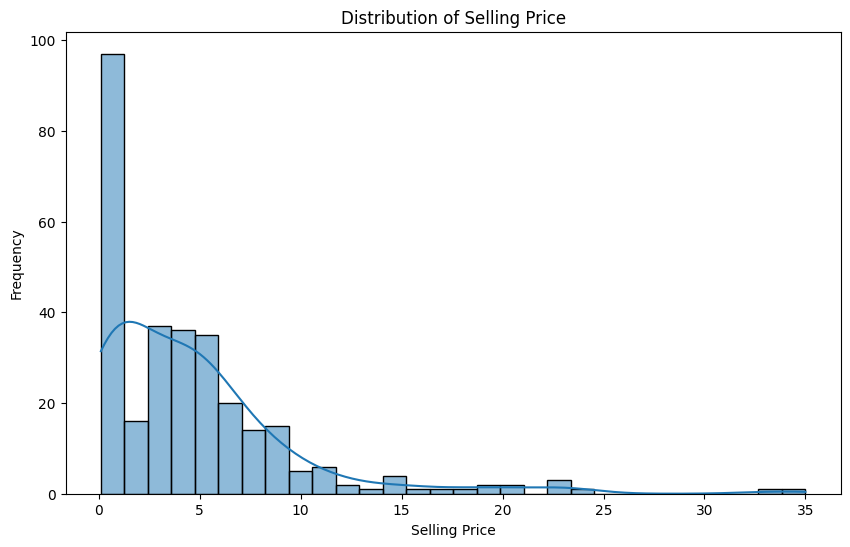

In [27]:
#visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

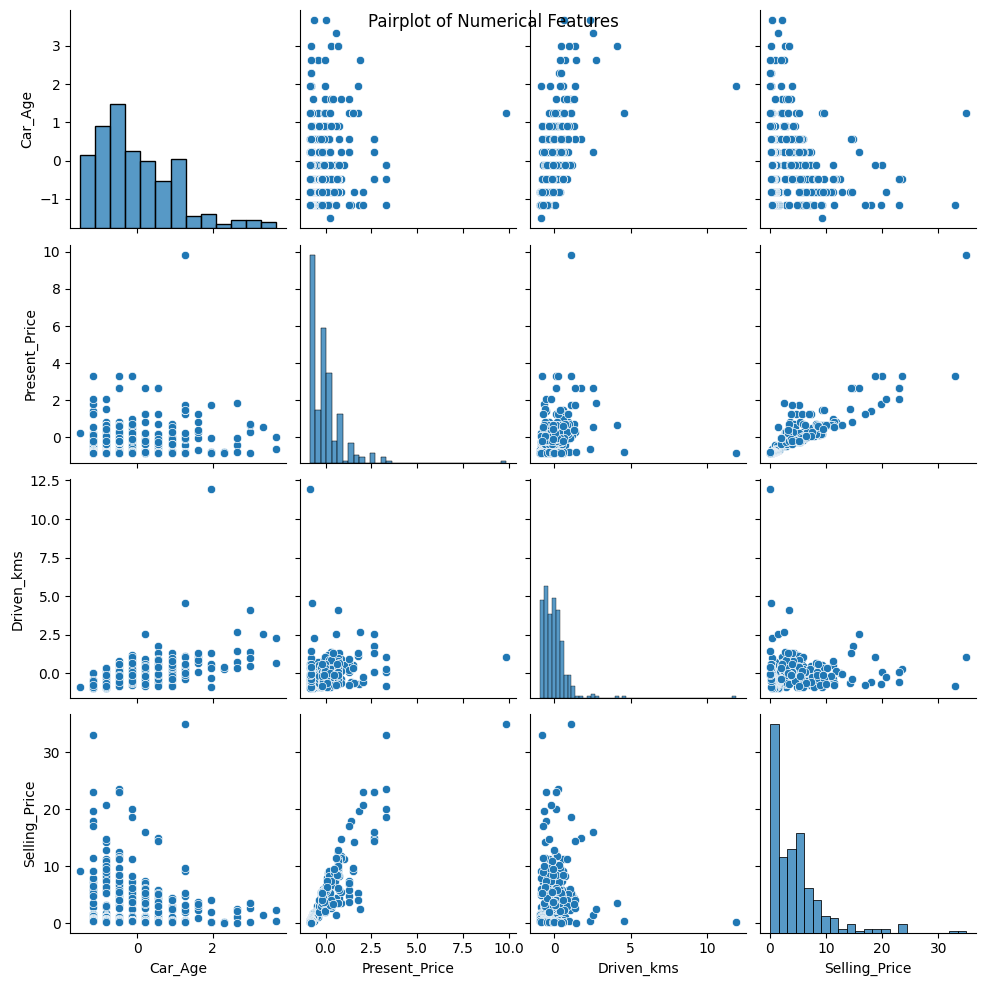

In [28]:
#visualize relationship between numerical features and the target variable
sns.pairplot(df[['Car_Age', 'Present_Price', 'Driven_kms','Selling_Price']])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

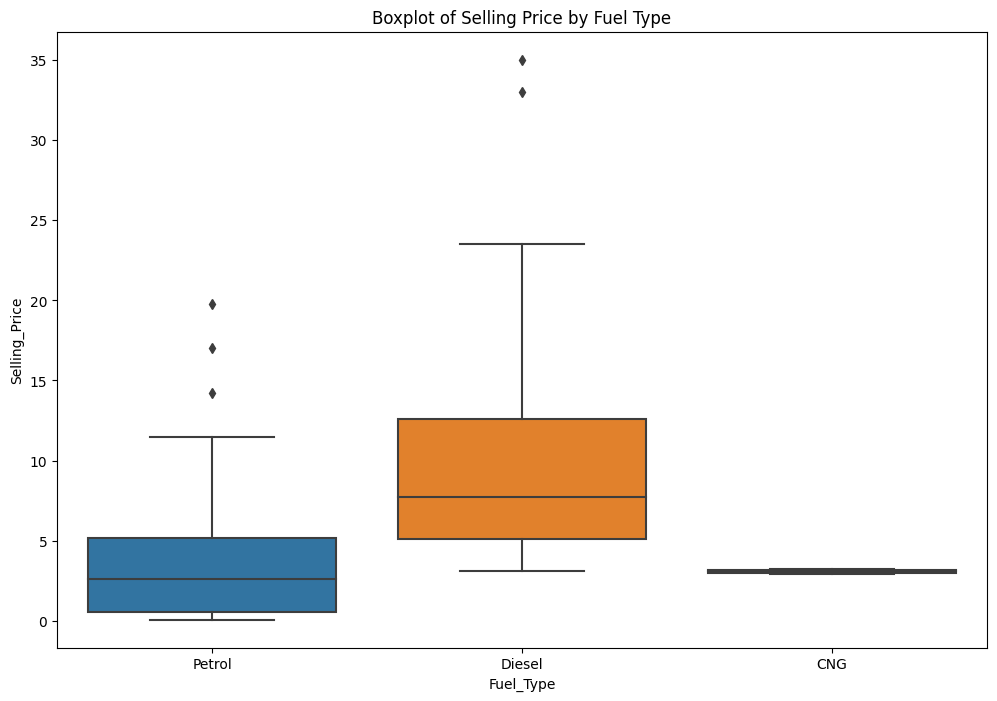

In [29]:
#visualize relationship between categorical features and the target variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Boxplot of Selling Price by Fuel Type')
plt.show()

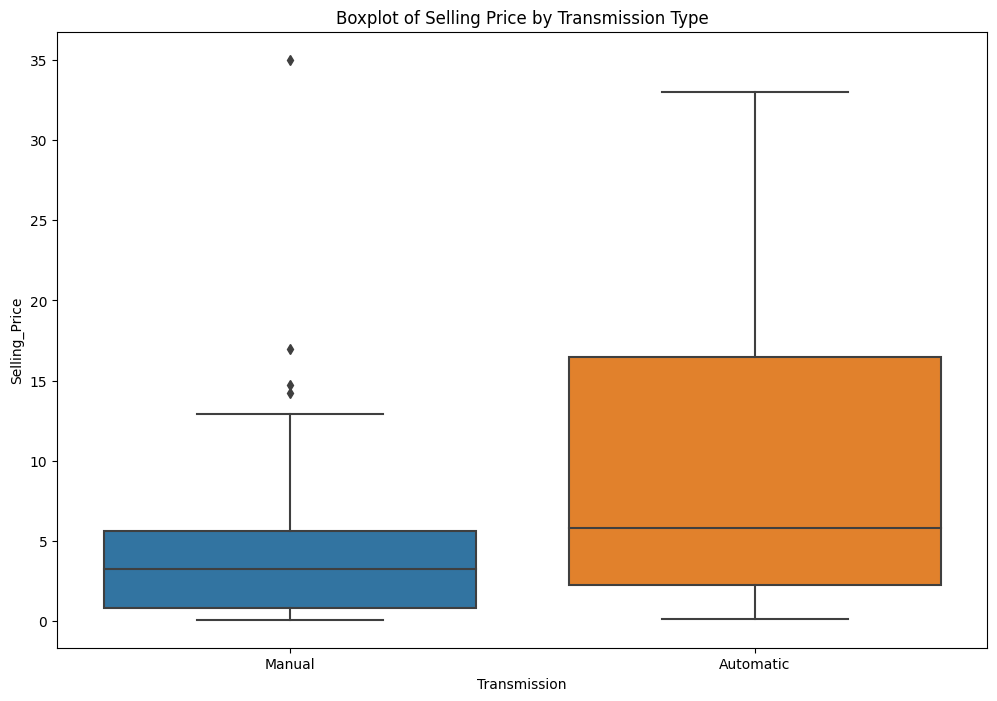

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Boxplot of Selling Price by Transmission Type')
plt.show()

In [31]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

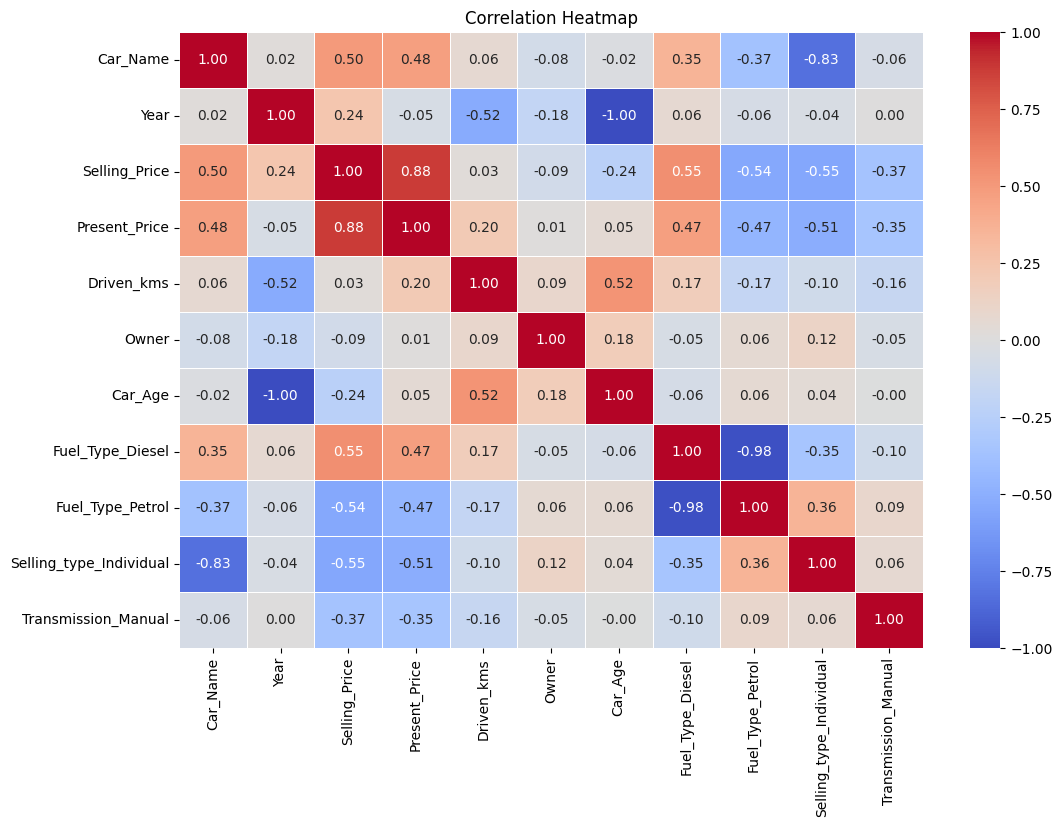

In [32]:
#visualize correlations between numercial features
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# split the data

In [33]:
#training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
#create and train the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_train = lin_reg_model.predict(X_train)
y_pred_test = lin_reg_model.predict(X_test)

In [36]:
#Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [37]:
print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

Mean Squared Error (Train): 2.951665220143986
Mean Squared Error (Test): 3.482684251428322


In [38]:
# R squared Error
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [39]:
print(f"R-squared (Train): {r2_train}")
print(f"R-squared (Test): {r2_test}")

R-squared (Train): 0.8883512170456057
R-squared (Test): 0.8488128552431262


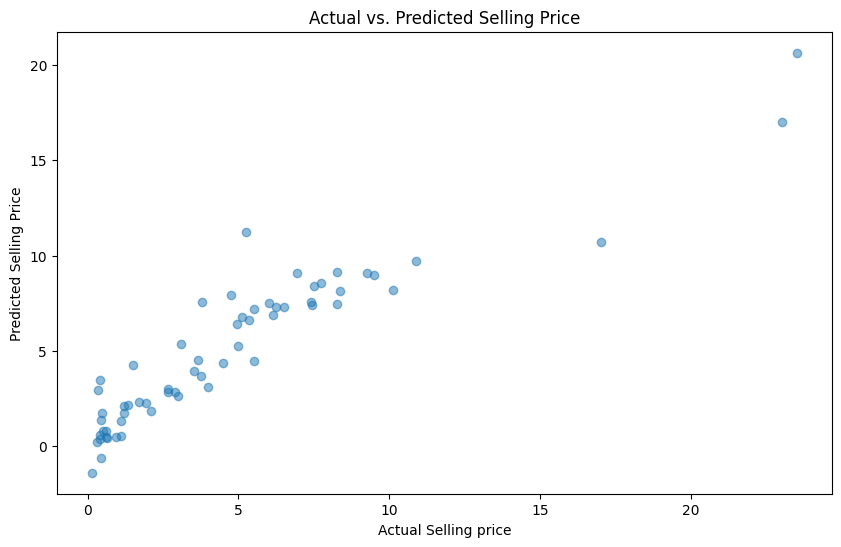

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual Selling price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()